# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Обратите внимание: в этом и во всех последующих дз за написание неоптимального кода баллы могут быть снижены. Это, в частности, относится к случаям, когда что-то можно сделать при помощи инструментов библиотек и не использовать циклы. Если вам совсем непонятно, как оптимально решить то или иное задание, посоветуйтесь с вашими семинаристами или ассистентами.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [3]:
#your code
Data.shape
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [4]:
#your code herDab
Data.drop(['Pclass','Sex','Cabin','Ticket', 'Embarked', 'Name'], axis=1).head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,0,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,0,35.0,0,0,8.0500
5,6,0,NaN,0,0,8.4583
6,7,0,54.0,0,0,51.8625
7,8,0,2.0,3,1,21.0750
8,9,1,27.0,0,2,11.1333
9,10,1,14.0,1,0,30.0708


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [5]:
#your code here
Data.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [6]:
#your code here 

without_unknown_gender_data = Data.loc[Data['Sex'] != 'unknown']
print(without_gender_data.shape)
print(Data.shape)

NameError: name 'without_gender_data' is not defined

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [ ]:
#your code here единица - мужик
# without_unknown_gender_data['Sex'] = np.where((without_unknown_gender_data['Sex']=='male'),0,1)
without_unknown_gender_data.head()

Посмотрим, как влияет пол на выживаемость.

In [ ]:
sns.barplot(x='Sex', y='Survived', data=without_unknown_gender_data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

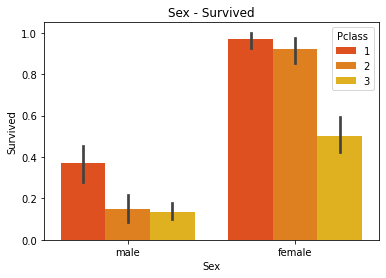

In [56]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=without_unknown_gender_data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

In [ ]:
sns.catplot(x="Sex", y="Age", data=without_unknown_gender_data, kind="box")
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

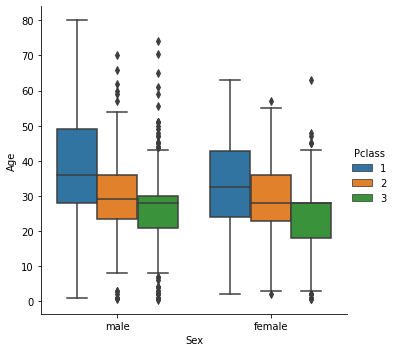

In [55]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=without_unknown_gender_data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [ ]:
print(without_unknown_gender_data['Embarked'].value_counts(dropna=False))
Data.shape

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [ ]:
without_unknown_gender_data['Embarked'].loc[without_unknown_gender_data['S']]

Переведем категориальный столбец в числовые с помощью OneHotEncoding, а именно, создадим три числовых столбца следующим образом:

In [ ]:
# Data['EmbS'] = Data.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# Data['EmbC'] = Data.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# Data['EmbQ'] = Data.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

Эту операцию можно сделать с помощью метода get_dummies.

In [8]:
embarked = pd.get_dummies(without_unknown_gender_data['Embarked'])
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


**Задание 7.** Удалите из таблицы Data категориальный столбец Embarked и добавьте в неё новые столбцы, полученные с помощью get_dummies.

In [9]:
without_unknown_gender_data.drop(['Embarked'], axis=1, inplace=True)

/home/jupyter/.local/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
without_unknown_gender_data.join(embarked)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,1,0,0


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [33]:
#your code here
without_unknown_gender_data['Age'].count()

TypeError: count() got an unexpected keyword argument 'dropna'

Заполним пропуски медианным значением Age.

In [36]:
median_age = without_unknown_gender_data['Age'].median()

without_unknown_gender_data['Age'].fillna(median_age, inplace=True)

/home/jupyter/.local/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [37]:
without_unknown_gender_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 886, dtype: float64

Нарисуем распределение возраста пассажиров.

/home/jupyter/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


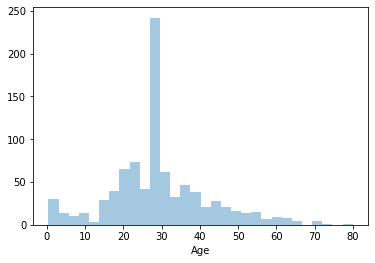

In [40]:
sns.distplot(Data['Age'], kde=False)
plt.show()

Посмотрим на распределение Pclass по возрастам.

/home/jupyter/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


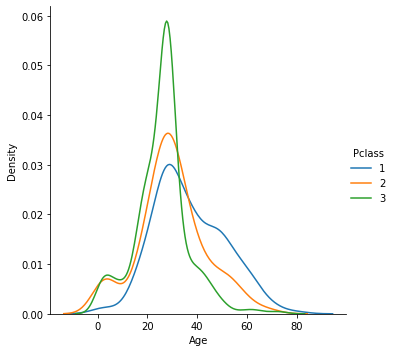

In [41]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [51]:
#your code here
without_unknown_gender_data['Fare'].count() # есть пропущенные значения
median_fare = without_unknown_gender_data['Fare'].mean()
median_fare
test1= without_unknown_gender_data['Fare'].fillna(median_fare, inplace=True)

/home/jupyter/.local/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [50]:
without_unknown_gender_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148


**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [54]:
Data['S'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

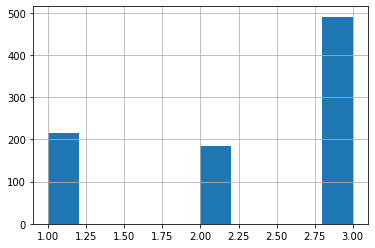

In [14]:
#your code here
import pandas as pd


**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [ ]:
Data['SibSp'].value_counts(dropna=False)

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [ ]:
Data['Parch'].value_counts(dropna=False)

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [ ]:
#your code here

# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [ ]:
#your code here

NumericData = ...

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

In [ ]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [ ]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [ ]:
#your code here

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [ ]:
#Your code here

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

In [ ]:
#your code here

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#your code here

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

In [ ]:
#your answer here